# ШАГ 1 Задача, гипотезы, тема

Для исследования используется датасет, содержащий информацию о факторах, влияющих на ожидаемую продолжительность жизни. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
Задача исследования - определить значимые признаки, которые влияют на ожидаемую продолжительность жизни для развитых и развивающихся стран

Выдвигаются следующие гипотезы:

$$
\begin{aligned}
&H_0:  \text{потребление алкоголя в развитых странах влияет сильнее на ожидаемую продолжительность жизни, чем в развивающихся} \\
&H_1:  \text{потребление алкоголя в развивающихся странах влияет сильнее на ожидаемую продолжительность жизни, чем в развитых}
\end{aligned}
$$

Датасет представляет достаточное количество факторов, однако стоит предположить, что основные факторы продолжительности  жизни в развитых странах не совпадут полностью с факторами развивающихся.

# ШАГ 2. Предобработка данных

## Датасет, данные и описание

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Датасет содержит только 2 категориальные переменные: название страны и принадлежность её к развивающемуся или развитому типу. Все остальные переменные количественные: или числовые, или отнормированные к единице (взятые в процентном отношении).

In [3]:
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1339,Jordan,2006,Developing,72.8,121.0,4,0.59,313.362601,98.0,1,...,98.0,8.80,98.0,0.1,2537.349000,5934232.0,3.9,3.8,0.733,13.7
1735,Montenegro,2012,Developing,75.6,11.0,0,0.01,648.133178,9.0,0,...,94.0,7.25,94.0,0.1,6586.719290,6261.0,1.9,1.9,0.797,15.1
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.000000,76.0,5,...,75.0,6.35,76.0,5.3,NaN,NaN,6.8,6.7,NaN,NaN
510,Canada,2001,Developing,79.4,8.0,2,7.60,3665.089703,NaN,34,...,88.0,9.10,89.0,0.1,23691.594720,31819.0,0.5,0.4,0.867,15.8
949,Gabon,2012,Developing,63.5,276.0,2,8.30,805.392528,82.0,2,...,8.0,3.13,82.0,4.9,9774.181170,1756817.0,6.3,6.2,0.669,12.5
375,Brunei Darussalam,2008,Developing,77.2,84.0,0,0.67,2538.941033,96.0,3,...,97.0,2.23,98.0,0.1,37951.286000,NaN,6.1,5.6,0.840,14.2
2681,Turkey,2015,Developing,75.8,16.0,15,NaN,0.000000,97.0,342,...,97.0,NaN,97.0,0.1,1979.525690,78271472.0,4.9,4.8,0.764,14.5
145,Azerbaijan,2014,Developing,72.5,119.0,5,0.01,306.182431,94.0,0,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2753,United Arab Emirates,2008,Developing,75.8,85.0,1,1.86,4003.908598,92.0,55,...,94.0,2.93,92.0,0.1,45758.955400,NaN,5.1,4.9,0.829,13.1
1818,Nepal,2010,Developing,68.0,178.0,23,0.24,84.623025,82.0,190,...,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1


Содержание столбцов:
Country - назвавние страны
Year - год сбора данных
Status - развивающаяся или развитая страна
Life expectancy - ожидаемая продолжительность жизни
Adult mortality - вероятность умереть от 15 до 60 лет на 1000 человек
Infant deapths - детская смертность на 1000 человек
Alcohol - потребление алкоголя в литрах в год на душу населения
Percentage expenditure - расходы на здравоохранение в процентах от ВВП на душу населения
Hepatis B - охват прививками от гепатита Б среди детей 1 года (%)
Measles - число случаев кори на 1000 человек
BMI - средний индекс массы тела у населения
under-five deaths  - число смертей детей до 5 лет на 1000 человек
Polio - уровень иммунизации от полиомиелита среди детей 1 года (%)
Total expenditure - доля расходов на здравоохранение
Diptheria - охват прививками от дифтерии среди детей 1 года (%)
HIV/AIDS - число смертей от ВИЧ/СПИД (0-4 года) на 1000 человек
GDP - ВВП на душу населения
Population - население
thinness  1-19 years - процент детей и подростков (1-19 лет) с недостатком веса
thinness 5-9 years - процент детей (5-9 лет) с недостатком веса
Income composition of resources  - ИЧР относительно структуры ресурсов
Schooling - среднее число лет обучения


Будет рассмотрен не весь датасет, а только часть с данными позднее 2005 года ввиду возможного существования в более ранних наблюдениях пробелов, которые не заменить

In [4]:
data = data[data['Year'] >= 2005]
data.shape

(2023, 22)

In [5]:
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
152,Azerbaijan,2007,Developing,73.0,14.0,6,1.02,176.010711,62.0,0,...,81.0,5.10,79.0,0.1,3851.437869,85813.0,2.8,2.9,0.708,11.6
36,Algeria,2011,Developing,74.9,116.0,21,0.56,509.002041,95.0,112,...,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
2739,Ukraine,2006,Developing,67.7,267.0,5,7.99,29.381727,96.0,42724,...,99.0,6.39,98.0,0.8,233.188310,4678775.0,2.6,2.7,0.716,14.7
261,Belize,2010,Developing,69.5,186.0,0,6.76,569.952712,96.0,0,...,96.0,5.85,96.0,0.2,4344.151770,32168.0,3.5,3.4,0.700,12.4
1577,Malawi,2008,Developing,50.0,525.0,36,1.27,74.344830,91.0,20,...,92.0,1.70,91.0,16.9,372.842678,14271234.0,7.0,6.9,0.400,9.6
1317,Japan,2012,Developed,83.3,58.0,2,7.39,121.586916,NaN,228,...,99.0,1.17,97.0,0.1,4863.476650,127629.0,1.9,1.7,0.889,15.3
1225,Iran (Islamic Republic of),2008,Developing,72.7,135.0,24,0.02,0.000000,99.0,127,...,99.0,6.28,99.0,0.1,NaN,NaN,7.6,7.8,0.716,12.1
1883,Niger,2009,Developing,57.1,263.0,51,0.11,5.665405,71.0,801,...,71.0,6.98,71.0,1.1,341.289462,15813913.0,11.0,1.8,0.307,4.2
953,Gabon,2008,Developing,61.6,298.0,2,8.75,11.054225,82.0,3,...,81.0,2.54,82.0,8.9,194.274600,1536411.0,6.8,6.6,0.651,12.4
1147,Honduras,2006,Developing,72.8,161.0,5,3.23,192.929783,94.0,0,...,94.0,7.63,95.0,0.8,1437.628785,754146.0,2.4,2.4,0.583,10.8


##Анализ и заполнение пропусков

In [6]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            189
percentage expenditure               0
Hepatitis B                        200
Measles                              0
 BMI                                24
under-five deaths                    0
Polio                                7
Total expenditure                  208
Diphtheria                           7
 HIV/AIDS                            0
GDP                                308
Population                         452
 thinness  1-19 years               24
 thinness 5-9 years                 24
Income composition of resources    117
Schooling                          113
dtype: int64

Было решено удалить строки, содержащие пропуски в следующих столбцах: в Population, GDP И Adult mortality, так как это величины, кардинально отличающиеся по странам, поэтому нецелесообразно заполнять какими-либо значениями.Остальные пропущенные значения будут заполнены медианой (происходит сознательное упрощение и заполнение медианой не по каждой стране отдельно, а по всему датасету в целом)

Для заполнения пропусков и анализа выбросов логично разделить датасет на две части: развивающиеся и развитые страны. Так как многие показатели у этих стран сильно отличаются, то заполнение значений медианой в общем датасете может привести к появлению крайне нереалистичных данных

In [7]:
data = data.dropna(subset=['Population', 'GDP','Life expectancy ', 'Adult Mortality'])

In [8]:
developed = data[data['Status'] == 'Developed']
developing = data[data['Status'] == 'Developing']

In [9]:
dict_for_na_replacement_developed = {'Alcohol': developed['Alcohol'].median(),
                           'Hepatitis B': developed['Hepatitis B'].median(),
                           ' BMI ': developed[' BMI '].median(),
                          'Polio': developed['Polio'].median(),
                          'Total expenditure': developed['Total expenditure'].median(),
                          'Diphtheria ': developed['Diphtheria '].median(),
                          ' thinness  1-19 years': developed[' thinness  1-19 years'].median(),
                          ' thinness 5-9 years': developed[' thinness 5-9 years'].median()}
dict_for_na_replacement_developing = {'Alcohol': developing['Alcohol'].median(),
                           'Hepatitis B': developing['Hepatitis B'].median(),
                           ' BMI ': developing[' BMI '].median(),
                          'Polio': developing['Polio'].median(),
                          'Total expenditure': developing['Total expenditure'].median(),
                          'Diphtheria ': developing['Diphtheria '].median(),
                          ' thinness  1-19 years': developing[' thinness  1-19 years'].median(),
                          ' thinness 5-9 years': developing[' thinness 5-9 years'].median()}

In [10]:
developed.fillna(dict_for_na_replacement_developed, inplace = True)
developing.fillna(dict_for_na_replacement_developing, inplace = True)

<ipython-input-10-8f7c0525aa0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed.fillna(dict_for_na_replacement_developed, inplace = True)
<ipython-input-10-8f7c0525aa0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing.fillna(dict_for_na_replacement_developing, inplace = True)


In [11]:
print(developing.isna().sum().sum(), developed.isna().sum().sum()) # все пропущенные значения были заполнены

0 0


In [12]:
from scipy.stats import zscore

In [13]:
developed_copy = developed.iloc[:,3:]
developing_copy = developing.iloc[:,3:]

In [14]:
developed_copy.shape[0], developing_copy.shape[0]

(286, 1271)

In [15]:
developed1 = developed_copy[developed_copy.apply(zscore) < 2.5]
developing1 = developing_copy[developing_copy.apply(zscore) < 2.5]
developed1.shape[0], developing1.shape[0]

(286, 1271)

Таким образом, выбросов в имеющихся данных, согласно zscore, не было обнаружено: количество строк в массивах не изменилось после рассмотрения только тех, где zscore был меньше 2.5

In [16]:
developing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


In [17]:
data = pd.concat([developed, developing], axis = 0) # -обратное соединение данных
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1919,Norway,2006,Developed,84.0,7.0,0,6.47,12829.254080,95.0,0,...,94.0,8.43,94.0,0.1,74114.697150,466677.0,0.8,0.7,0.931,17.5
2810,Uruguay,2015,Developing,77.0,116.0,0,2.57,0.000000,95.0,0,...,95.0,5.63,95.0,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5
1000,Germany,2009,Developed,80.0,79.0,2,11.22,7641.270645,88.0,574,...,95.0,11.40,96.0,0.1,41732.772500,819237.0,1.1,1.1,0.906,16.7
2723,Uganda,2006,Developing,54.9,41.0,93,9.81,50.839014,64.0,5736,...,62.0,9.86,64.0,8.6,336.459392,2955662.0,6.4,6.4,0.434,10.6
1298,Jamaica,2015,Developing,76.2,125.0,1,2.57,0.000000,91.0,0,...,91.0,5.63,91.0,0.5,4965.989857,2871934.0,1.8,1.7,0.729,12.8
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,119714696.0,27.0,27.9,0.556,10.2
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
1371,Kenya,2006,Developing,55.3,388.0,68,1.76,52.603854,8.0,1847,...,77.0,4.24,8.0,10.3,697.663850,37525.0,8.5,8.4,0.483,9.7
649,Croatia,2007,Developed,75.8,114.0,0,12.56,2019.812779,95.0,0,...,96.0,7.44,96.0,0.1,13546.698720,4436.0,1.8,1.7,0.793,14.3
1605,Maldives,2012,Developing,77.6,65.0,0,0.01,1259.940376,99.0,0,...,99.0,9.16,99.0,0.1,6541.746500,385.0,13.8,13.9,0.675,12.1


#Шаг 3. Создание новых признаков.

In [18]:
data['vaccination_ratio'] = (data['Hepatitis B'] + data['Diphtheria '] + data['Polio'])/3
developed['vaccination_ratio'] = (developed['Hepatitis B'] + developed['Diphtheria '] + developed['Polio'])/3
developing['vaccination_ratio'] = (developing['Hepatitis B'] + developing['Diphtheria '] + developing['Polio'])/3

<ipython-input-18-48142b576946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed['vaccination_ratio'] = (developed['Hepatitis B'] + developed['Diphtheria '] + developed['Polio'])/3
<ipython-input-18-48142b576946>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing['vaccination_ratio'] = (developing['Hepatitis B'] + developing['Diphtheria '] + developing['Polio'])/3


Признак vaccination_ratio содержит в себе среднее значение уровня вакцинации по трем указанным прививкам

In [19]:
def income_class(gdp_per_capita):
    if gdp_per_capita < 1085:
        return 'low income'
    if gdp_per_capita < 4225:
        return 'lower-middle income'
    if gdp_per_capita < 13205:
        return 'upper-middle income'
    return 'high income'

In [20]:
data['income_group'] = data['GDP'].apply(income_class)
developed['income_group'] = developed['GDP'].apply(income_class)
developing['income_group'] = developing['GDP'].apply(income_class)

<ipython-input-20-f65d05f07100>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed['income_group'] = developed['GDP'].apply(income_class)
<ipython-input-20-f65d05f07100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing['income_group'] = developing['GDP'].apply(income_class)


Признак income_group содержит в себе информацию о принадлежности страны к одному из 4 типов по уровню ВВП на душу населения, согласно классификации Всемирного Банка

In [21]:
def bmi_translator(bmi):
    if bmi < 16:
        return 'Severe thinness'
    if bmi < 17:
        return 'Moderate thinness'
    if bmi < 18.5:
        return 'Mild thinness'
    if bmi < 25:
        return 'Normal range'
    if bmi < 30:
        return 'Overweigth'
    if bmi <35:
        return 'Obese (Class I)'
    if bmi < 40:
        return 'Obese (Class II)'
    return 'Obese (Class III)'


In [22]:
data['bmi_translated'] = data[' BMI '].apply(bmi_translator)
developed['bmi_translated'] = developed[' BMI '].apply(bmi_translator)
developing['bmi_translated'] = developing[' BMI '].apply(bmi_translator)


<ipython-input-22-036d9665ec98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed['bmi_translated'] = developed[' BMI '].apply(bmi_translator)
<ipython-input-22-036d9665ec98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing['bmi_translated'] = developing[' BMI '].apply(bmi_translator)


Признак bmi_translated содержит в себе информацию о том, к какой группе, согласно классификации ВОЗ, относится в среднем население страны

In [23]:
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,vaccination_ratio,income_group,bmi_translated
1064,Guatemala,2009,Developing,76.0,198.0,12,2.14,445.442337,92.0,0,...,0.4,2635.753474,1431628.0,1.3,1.3,0.596,10.4,92.000000,lower-middle income,Obese (Class III)
582,Colombia,2009,Developing,73.6,15.0,13,4.34,941.646405,92.0,0,...,0.1,5148.422113,45416181.0,2.2,2.0,0.691,12.4,92.000000,upper-middle income,Obese (Class III)
262,Belize,2009,Developing,69.5,184.0,0,6.85,549.809610,97.0,0,...,0.3,4258.788611,313929.0,3.5,3.4,0.700,12.7,97.333333,upper-middle income,Obese (Class III)
2045,Poland,2009,Developed,75.7,136.0,2,10.70,1299.159757,98.0,115,...,0.1,11527.593230,3815163.0,2.1,2.3,0.818,15.1,97.666667,upper-middle income,Obese (Class III)
922,Finland,2007,Developing,79.3,96.0,0,10.45,6147.132300,89.0,0,...,0.1,48288.549100,528872.0,0.9,0.8,0.873,17.2,95.000000,high income,Obese (Class III)
681,Cyprus,2007,Developed,78.9,63.0,0,11.56,1958.525877,93.0,0,...,0.1,31386.632650,163712.0,0.9,1.0,0.836,13.5,95.666667,high income,Obese (Class III)
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5,48.666667,low income,Overweigth
1307,Jamaica,2006,Developing,74.0,15.0,1,3.63,194.092569,97.0,0,...,1.5,4313.168200,276279.0,1.9,1.7,0.709,12.5,97.000000,upper-middle income,Obese (Class III)
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,99.000000,upper-middle income,Obese (Class III)
874,Estonia,2007,Developing,73.0,189.0,0,17.87,1904.124690,95.0,1,...,0.1,16586.452000,13468.0,2.0,2.1,0.829,16.1,95.000000,high income,Obese (Class III)


# ШАГ 4. Разведывательный анализ данных.

In [24]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,vaccination_ratio
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,...,1557.000000,1557.000000,1557.000000,1557.000000,1.557000e+03,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,2009.987797,69.684907,164.477842,31.324342,4.627592,937.360902,82.312139,1774.460501,38.160597,43.146435,...,6.093629,83.678870,1.632691,7521.634939,1.381225e+07,4.783943,4.823956,0.649798,12.305202,82.993577
std,3.160323,9.363731,120.281387,117.570291,4.020906,2402.487560,23.103493,9383.002672,20.331290,159.381203,...,2.384829,22.062651,4.382995,14808.555249,6.628133e+07,4.527045,4.569897,0.180830,3.133621,19.324939
min,2005.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,...,0.370000,2.000000,0.100000,5.668726,3.600000e+01,0.100000,0.100000,0.000000,0.000000,7.000000
25%,2007.000000,63.100000,71.000000,0.000000,1.000000,24.732997,81.000000,0.000000,19.600000,1.000000,...,4.510000,81.000000,0.100000,528.312560,2.231750e+05,1.500000,1.500000,0.506000,10.300000,75.666667
50%,2010.000000,72.200000,144.000000,3.000000,3.590000,119.212428,92.000000,11.000000,42.700000,4.000000,...,5.820000,93.000000,0.100000,1922.413880,1.444844e+06,3.000000,3.200000,0.687000,12.500000,92.000000
75%,2013.000000,75.800000,232.000000,22.000000,7.550000,587.882823,96.000000,272.000000,57.200000,30.000000,...,7.800000,97.000000,0.900000,5949.116770,7.815949e+06,7.100000,7.100000,0.780000,14.600000,96.000000
max,2015.000000,89.000000,717.000000,1500.000000,17.870000,19479.911610,99.000000,131441.000000,77.600000,2000.000000,...,14.390000,99.000000,49.100000,119172.741800,1.293859e+09,27.200000,28.100000,0.948000,20.400000,99.000000


In [25]:
developed.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,vaccination_ratio
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,2.860000e+02,286.000000,2.860000e+02,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2010.000000,79.993706,79.223776,0.608392,9.968252,3466.197243,91.493007,359.290210,52.313636,0.797203,...,7.536364,94.283217,1.000000e-01,24567.223155,6.998969e+06,1.300699,1.280070,0.863626,16.073427,93.299534
std,3.167821,4.063008,48.404642,0.914100,2.424586,4455.575501,14.267308,1640.381717,17.752519,1.127391,...,2.687644,9.659112,2.780423e-17,25212.880264,1.461310e+07,0.711460,0.782789,0.047854,1.534856,8.083243
min,2005.000000,71.100000,5.000000,0.000000,0.010000,0.000000,2.000000,0.000000,6.000000,0.000000,...,1.170000,9.000000,1.000000e-01,12.277330,1.230000e+02,0.300000,0.200000,0.745000,13.400000,37.666667
25%,2007.000000,77.500000,58.000000,0.000000,9.042500,245.375701,94.000000,1.000000,55.700000,0.000000,...,6.677500,94.000000,1.000000e-01,4652.017710,2.189205e+05,0.700000,0.700000,0.822000,15.025000,93.000000
50%,2010.000000,81.000000,67.000000,0.000000,10.460000,1290.157850,95.000000,10.000000,58.250000,0.000000,...,8.150000,96.000000,1.000000e-01,13744.719630,1.553068e+06,1.050000,1.000000,0.874000,15.900000,95.666667
75%,2013.000000,82.300000,88.000000,1.000000,11.467500,6011.088321,96.000000,102.500000,61.400000,1.000000,...,9.250000,98.000000,1.000000e-01,41772.360808,7.254821e+06,1.800000,1.800000,0.902000,16.875000,97.000000
max,2015.000000,89.000000,229.000000,3.000000,15.190000,19479.911610,99.000000,22004.000000,69.600000,4.000000,...,11.970000,99.000000,1.000000e-01,119172.741800,8.246942e+07,3.300000,3.800000,0.948000,20.400000,99.000000


In [26]:
developing.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,vaccination_ratio
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,...,1271.000000,1271.000000,1271.000000,1271.000000,1.271000e+03,1271.000000,1271.00000,1271.000000,1271.000000,1271.000000
mean,2009.985051,67.365224,183.661684,38.236035,3.425838,368.322984,80.246263,2092.901652,34.975885,52.675846,...,5.768985,81.292683,1.977577,3686.042312,1.534538e+07,5.567742,5.62140,0.601683,11.457278,80.674534
std,3.159876,8.625712,123.267114,129.132317,3.258960,923.343902,24.187651,10330.096599,19.505556,175.008154,...,2.184712,23.332771,4.784220,6772.592626,7.295085e+07,4.652809,4.68879,0.164122,2.754094,20.336916
min,2005.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,...,0.370000,2.000000,0.100000,5.668726,3.600000e+01,0.100000,0.10000,0.000000,0.000000,7.000000
25%,2007.000000,61.550000,97.000000,1.000000,0.540000,19.717197,76.000000,0.000000,18.800000,1.000000,...,4.370000,77.000000,0.100000,445.709149,2.304245e+05,2.000000,2.00000,0.480500,9.800000,71.500000
50%,2010.000000,68.500000,164.000000,6.000000,2.570000,76.604422,89.000000,11.000000,31.850000,8.000000,...,5.630000,91.000000,0.200000,1313.889646,1.421597e+06,4.700000,4.80000,0.630000,11.700000,88.333333
75%,2013.000000,74.100000,256.000000,29.000000,5.610000,372.974139,96.000000,346.000000,53.150000,40.000000,...,6.915000,96.000000,1.500000,4206.010865,8.501721e+06,7.800000,7.80000,0.726000,13.200000,95.666667
max,2015.000000,89.000000,717.000000,1500.000000,17.870000,9748.636237,99.000000,131441.000000,77.600000,2000.000000,...,14.390000,99.000000,49.100000,52496.694870,1.293859e+09,27.200000,28.10000,0.919000,17.300000,99.000000


In [27]:
develop_life_corr = pd.DataFrame(developed.corrwith(developed['Life expectancy ']))
developing_life_corr = pd.DataFrame(developing.corrwith(developing['Life expectancy ']))

<ipython-input-27-94837ebca8e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  develop_life_corr = pd.DataFrame(developed.corrwith(developed['Life expectancy ']))
<ipython-input-27-94837ebca8e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  developing_life_corr = pd.DataFrame(developing.corrwith(developing['Life expectancy ']))


In [28]:
devig = developing_life_corr.values
deved = develop_life_corr.values

In [29]:
corr_matrix_for_life_exp = pd.DataFrame({'feature': data.columns[~(data.dtypes == 'object').values], 'developing': devig.tolist(), 'developed': deved.tolist()})
corr_matrix_for_life_exp

,feature,developing,developed
0,Year,[0.13793706503952655],[0.19404609472738957]
1,Life expectancy,[0.9999999999999998],[1.0]
2,Adult Mortality,[-0.6646180749476123],[-0.5629422779222402]
3,infant deaths,[-0.1429495223500041],[-0.04865891262544472]
4,Alcohol,[0.2098842533277506],[-0.25622331926334724]
5,percentage expenditure,[0.37106325828254133],[0.2892409808422282]
6,Hepatitis B,[0.15659660151694305],[-0.02935745934397221]
7,Measles,[-0.025651008004474007],[-0.09295674911008484]
8,BMI,[0.5409953443497577],[-0.011273986133610619]
9,under-five deaths,[-0.17084134923948566],[-0.03275834179698668]


Предварительно можно заметить, что число лет обучения для развивающихся стран имеет значительно большую корреляцию, чем для развитых,так же дефицит веса в развитых странах имеет значительно более заметную корреляцию, чем в развивающихся. При этом индекс массы тела имеет корреляцию значимо отличимую от 0 только для развивающихся стран. То же самое можно сказать и про уровень иммунизации по трем болезням: у развитых стран этот показатель не влияет на продолжительность жизни, а у развивающихся - влияет. Возможно, дело в том, что в развитых стран уровень иммунизации близок к 100, поэтому его изменение никак не влияет и практически не является фактором, в то время как для развивающихся - это значимо. Среднее значение уровня иммунизации в развитых странах: 91.49; 94.12; 94.28, а в развивающихся: 80.25; 80.48; 81.29. Для гепатита, полиомиелита и дифтерии соответственно

In [30]:
data.groupby('Status')['Schooling'].mean()

Status
Developed     16.073427
Developing    11.457278
Name: Schooling, dtype: float64

Ожидаемо, в развитых странах выше продолжительность обучения

In [31]:
data.groupby('Status')['Alcohol',' BMI '].mean()

<ipython-input-31-35a89d2764b3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Status')['Alcohol',' BMI '].mean()


,Alcohol,BMI
Status,,
Developed,9.968252,52.313636
Developing,3.425838,34.975885


Результат достаточно противоречивый: с одной стороны, у людей в развитых странах больше доход, а поэтому выше доступ к продуктам питания и алкоголю. Но с другой стороны, обычно самая доступная еда, приводит к ожирению в наибольшей степени, поэтому можно было бы ожидать более высокий уровень у развивающихся стран

In [32]:
data.groupby('Status')[' thinness  1-19 years',' thinness 5-9 years'].mean()

<ipython-input-32-9423ac8fd06d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Status')[' thinness  1-19 years',' thinness 5-9 years'].mean()


,thinness 1-19 years,thinness 5-9 years
Status,,
Developed,1.300699,1.28007
Developing,5.567742,5.62140


Предыдущий результат подтверждается и средним числом детей с недосатком веса на 1000 человек: в развивающихся странах он выше

In [33]:
data.groupby('income_group')['Adult Mortality', 'infant deaths'].mean()

<ipython-input-33-7007ed2143b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('income_group')['Adult Mortality', 'infant deaths'].mean()


,Adult Mortality,infant deaths
income_group,,
high income,83.619718,0.967136
low income,207.774194,45.662139
lower-middle income,161.922353,44.190588
upper-middle income,142.681818,8.757576


С ростом дохода в стране снижается как детская, так и взрослая смертность. Притом при переходе из низкого дохода в средний и высокий - наиболее значительно

# ШАГ 5. Визуализация

In [34]:
import seaborn as sns

Изначальные предположения:
$1$ С ростом ВВП на душу населения растет и ожидаемая продолжительность жизни
$2$ С ростом потребления алкоголя растет ИМТ
$3$ Расходы на здравоохранение зависят от кризисов и выше у развитых стран


[Text(0.5, 1.0, 'Зависимость ожидаемой продолжительности жизни от ВВП')]

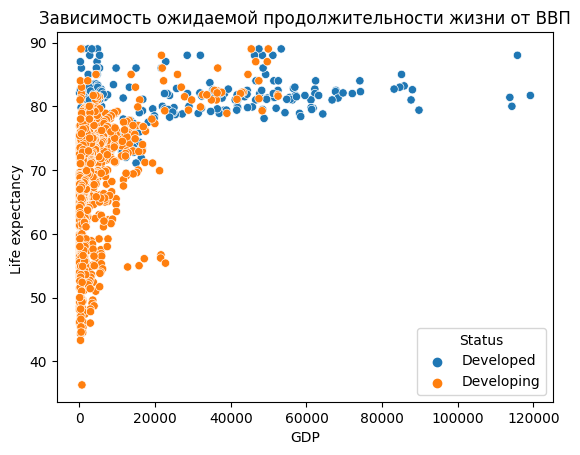

In [35]:
sns.scatterplot(data = data, x = 'GDP', y = 'Life expectancy ', hue = 'Status').set(title = 'Зависимость ожидаемой продолжительности жизни от ВВП')

[Text(0.5, 1.0, 'Зависимость ИМТ от потребления алкоголя')]

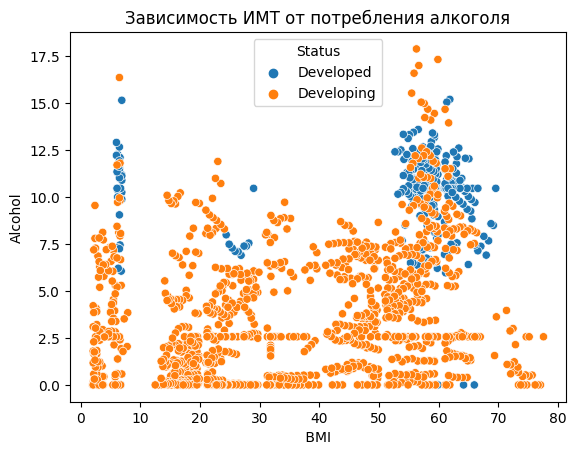

In [36]:
sns.scatterplot(data = data, x = ' BMI ', y = 'Alcohol', hue = 'Status').set(title = 'Зависимость ИМТ от потребления алкоголя')

[Text(0.5, 1.0, 'Расходы на здравоохранение по годам у развитых и развивающихся стран')]

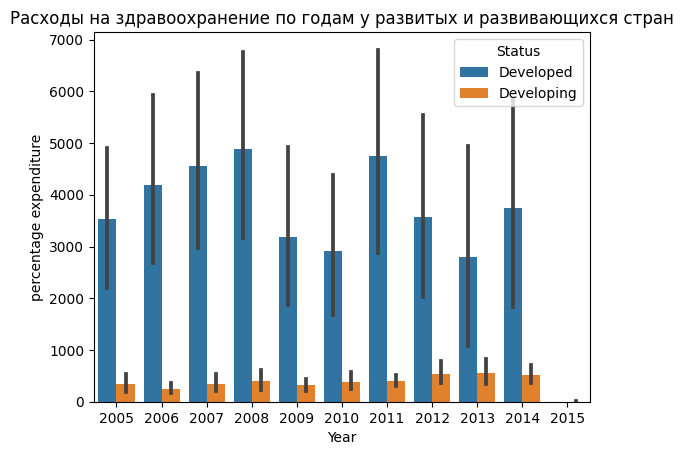

In [37]:
sns.barplot(data = data, x = 'Year', y = 'percentage expenditure', hue = 'Status').set(title = 'Расходы на здравоохранение по годам у развитых и развивающихся стран')

Таким образом, в качестве гипотез могут быть рассмотрены предположения 1 и 3, так как явной связи между потреблением алкоголя и ИМТ не видно (идейное обоснование: с ростом потребления алкоголя человек может вести менее подвижный образ жизни и из-за этого набирать вес)

# ШАГ 6. Обучение линейной регрессии

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Создание базовой модели

In [39]:
data = data.drop(['Country','Year'], axis = 1)


In [40]:
developed_final = data[data['Status'] == 'Developed'].drop('Status', axis = 1)
developing_final = data[data['Status'] != 'Developed'].drop('Status', axis = 1)
data = data.drop('Status', axis = 1)

In [41]:
data_final = pd.get_dummies(data, drop_first = True)
developed_final = pd.get_dummies(developed_final, drop_first = True)
developing_final = pd.get_dummies(developing_final, drop_first = True)

In [42]:
X = data_final.drop('Life expectancy ', axis = 1)
y = data_final['Life expectancy ']


In [43]:
np.random.seed(18)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.3)

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
print(f"Train mse: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test mse: {mean_squared_error(y_test, lr.predict(X_test))}")
print(f"R^2: {lr.score(X_test,y_test)}")

Train mse: 12.318941627025211
Test mse: 11.503616471632967
R^2: 0.8637089842369704


## Попытка улучшить результат с помощью регуляризации и стандартизации

In [47]:
scaler = StandardScaler() #объект для стандартизации: вычитает из каждого элемента мат.ожидание столбца и делит на ст.отклонение

In [48]:
X_train_scaled = scaler.fit_transform(X_train) #обучение только на части train, чтобы не было перехода данных из разделенных выборок
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import ElasticNetCV #регрессия, объединяющая в себе L1 и L2 регуляризацию
model = ElasticNetCV()
model.fit(X_train_scaled, y_train)

ElasticNetCV()

In [50]:
print(f"Train mse: {mean_squared_error(y_train, model.predict(X_train_scaled))}")
print(f"Test mse: {mean_squared_error(y_test, model.predict(X_test_scaled))}")
print(f'R^2: {model.score(X_test_scaled, y_test)}')

Train mse: 12.6132102933677
Test mse: 11.833678710152585
R^2: 0.8597985167884261


In [51]:
lr.coef_

array([-1.61024606e-02,  5.79433497e-02, -7.93399142e-02,  2.52391147e-04,
       -2.25991355e-02,  2.97805816e-06, -1.35631420e-02, -4.43086984e-02,
        6.69711464e-03,  1.19448681e-01,  3.99099476e-02, -5.47578511e-01,
       -9.78623950e-06, -8.38355945e-10, -2.88744655e-02, -3.81914528e-04,
        1.58349044e+01,  6.43341473e-01,  8.00264183e-03, -9.02940885e-01,
       -3.81888204e-01, -6.47138128e-01,  1.17906169e+00, -1.29333875e+00,
        1.12187257e+00, -7.44444903e-01,  1.89240965e+00,  1.06266856e+00,
        1.11142181e-01])

In [52]:
model.coef_

array([-2.05627644e+00,  0.00000000e+00, -2.82035091e-01,  4.44794858e-01,
       -3.24821865e-01,  1.91327584e-01,  2.69241282e-03, -3.88810866e-01,
        2.18685943e-01,  2.54655942e-01,  9.18966815e-01, -2.34713567e+00,
        8.76171460e-02,  1.17266914e-02, -1.64177964e-02, -0.00000000e+00,
        2.83863452e+00,  1.98223205e+00,  0.00000000e+00, -2.53165405e-01,
        0.00000000e+00, -7.25668091e-02,  6.72531812e-02, -5.76177122e-01,
        1.07469758e-01, -1.26913797e-01,  6.14825009e-01,  1.26871491e-01,
       -0.00000000e+00])

Хотя введение регуляризации не улучшило качество модели, оно позволило удалить ненужные признаки (вес у которых оказался равен 0): infant deaths, BMI, thinness 5-9 years, vaccination_ratio, часть признаков, полученных после one-hot encoding. Это ожидаемо, если учесть тот факт, что значительная часть из них получилась из признака bmi_translated, полученного от BMI, признака, оказавшегося незначимым

## Регрессия для разных групп стран

### Базовая версия

In [53]:
lr_developed = LinearRegression()
lr_developing = LinearRegression()

In [54]:
X_developed = developed_final.drop('Life expectancy ', axis = 1)
y_developed = developed_final['Life expectancy ']
X_developing = developing_final.drop('Life expectancy ', axis = 1)
y_developing  = developing_final['Life expectancy ']

In [55]:
np.random.seed(18)
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_developed, y_developed, test_size  = 0.3)
X_train_undev, X_test_undev, y_train_undev, y_test_undev = train_test_split(X_developing, y_developing, test_size  = 0.3)

In [56]:
lr_developed.fit(X_train_dev, y_train_dev)
lr_developing.fit(X_train_undev, y_train_undev)

LinearRegression()

In [57]:
print(f"Train mse developed: {mean_squared_error(y_train_dev, lr_developed.predict(X_train_dev))}")
print(f"Test mse developed: {mean_squared_error(y_test_dev, lr_developed.predict(X_test_dev))}")
print(f"R^2 developed: {lr_developed.score(X_test_dev,y_test_dev)}")

Train mse developed: 5.88424039075185
Test mse developed: 6.983331836668358
R^2 developed: 0.5783809438818976


In [58]:
print(f"Train mse developing: {mean_squared_error(y_train_undev, lr_developing.predict(X_train_undev))}")
print(f"Test mse developing: {mean_squared_error(y_test_undev, lr_developing.predict(X_test_undev))}")
print(f"R^2 developing: {lr_developing.score(X_test_undev,y_test_undev)}")

Train mse developing: 11.751105933245029
Test mse developing: 12.887004861664693
R^2 developing: 0.8035038248273547


Таким образом, модель показывает меньшую среднекватратичную ошибку на выборке развитых стран, но r^2 выше у развивающихся. Отчасти это может быть вызвано большим размером выборки

### Стандартизация и регуляризация

In [59]:
scaler_dev = StandardScaler()
scaler_undev = StandardScaler()

In [60]:
X_train_dev_scaled = scaler_dev.fit_transform(X_train_dev)
X_test_dev_scaled = scaler_dev.transform(X_test_dev)
X_train_undev_scaled = scaler_undev.fit_transform(X_train_undev)
X_test_undev_scaled = scaler_undev.transform(X_test_undev)

In [61]:
model_dev = ElasticNetCV()
model_undev = ElasticNetCV()

In [62]:
model_dev.fit(X_train_dev_scaled, y_train_dev)
model_undev.fit(X_train_undev_scaled, y_train_undev)

ElasticNetCV()

In [63]:
print(f"Train mse developed: {mean_squared_error(y_train_dev, model_dev.predict(X_train_dev_scaled))}")
print(f"Test mse developed: {mean_squared_error(y_test_dev, model_dev.predict(X_test_dev_scaled))}")
print(f"R^2 developed: {model_dev.score(X_test_dev_scaled,y_test_dev)}")

Train mse developed: 6.416801152713623
Test mse developed: 5.929179891187593
R^2 developed: 0.6420254274398639


In [64]:
print(f"Train mse developing: {mean_squared_error(y_train_undev, model_undev.predict(X_train_undev_scaled))}")
print(f"Test mse developing: {mean_squared_error(y_test_undev, model_undev.predict(X_test_undev_scaled))}")
print(f"R^2 developing: {model_undev.score(X_test_undev_scaled,y_test_undev)}")

Train mse developing: 11.954849274307056
Test mse developing: 12.966723715022582
R^2 developing: 0.8022883019077839


Таким образом, регуляризация и стандартизация помогла в улучшении качества на выборке развитых стран

In [65]:
model_dev.coef_

array([-0.36722328,  0.04289444, -0.21939431, -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.09650148,  0.        , -0.        , -0.        , -0.85421131,
       -0.59001698,  1.48359305, -0.        ,  0.06196039,  0.13103649,
        0.31722664, -0.00527693, -0.27532175,  0.22978105,  0.        ])

In [66]:
X_developed.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'vaccination_ratio',
       'income_group_low income', 'income_group_lower-middle income',
       'income_group_upper-middle income', 'bmi_translated_Obese (Class III)',
       'bmi_translated_Overweigth', 'bmi_translated_Severe thinness'],
      dtype='object')

In [67]:
model_undev.coef_

array([-1.83818573,  1.64576832, -0.78715531,  0.59307299, -0.48763273,
        0.18035   , -0.37390016, -1.99612017,  0.23216421,  0.27635026,
        0.87720113, -2.4887997 ,  0.09429399,  0.07191128, -0.00769076,
       -0.06900315,  2.62647607,  1.93703695,  0.        , -0.29872825,
       -0.17328508, -0.13729184,  0.11384334, -0.43580948,  0.38207462,
       -0.04580201,  1.36268392,  0.35300377,  0.36858853])

In [68]:
X_developing.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'vaccination_ratio',
       'income_group_low income', 'income_group_lower-middle income',
       'income_group_upper-middle income', 'bmi_translated_Moderate thinness',
       'bmi_translated_Normal range', 'bmi_translated_Obese (Class I)',
       'bmi_translated_Obese (Class II)', 'bmi_translated_Obese (Class III)',
       'bmi_translated_Overweigth', 'bmi_translated_Severe thinness'],
      dtype='object')

Таким образом, действительно влияние алкоголя выше в развивающихся странах, и коэффициенты у модели для развивающихся стран значительно выше, чем для развитых - большая зависимость и волатильность от факторов, тогда как у развитых стран все более устойчиво

# Вклад участников:
Шаг 1 - Скоробогатова Татьяна,
Шаг 2 - Олейников Андрей,
Шаг 3 - Скоробогатова Татьяна,
Шаг 4 - Олейников Андрей,
Шаг 5 - Скоробогатова Татьяна,
Шаг 6 - Олейников Андрей